In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the data
data = pd.read_csv("house_prices.csv")

In [ ]:
# Explore the data

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [16]:
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [17]:
# Check for missing values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


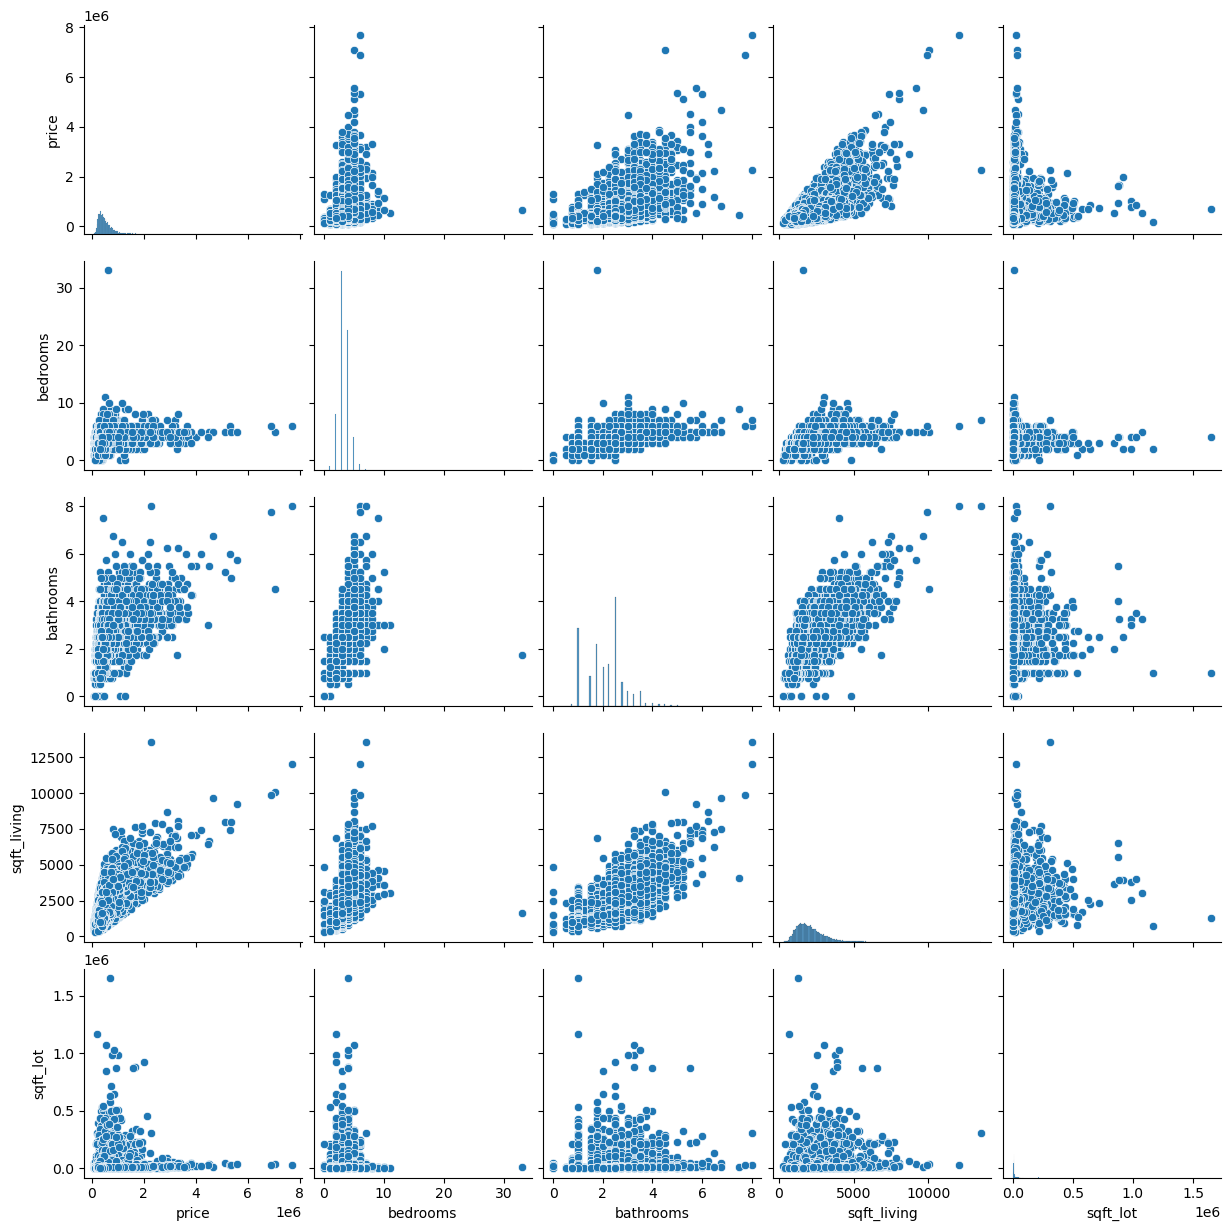

In [18]:
# Visualize the data
sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

In [27]:
# Prepare the data
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
y = data['price']
m = len(y)  # Number of training examples

In [28]:
# Feature scaling 
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(m), X]  # Add intercept term to X

In [29]:
# Initialize parameters
w = np.zeros(X.shape[1])  # Initialize parameters to zeros
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

In [30]:
# The cost function
def compute_cost(X, y, w):
    m = len(y)
    J = np.sum((X.dot(w) - y) ** 2) / (2 * m)
    return J

In [33]:
# Gradient descent
def gradient_descent(X, y, w, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        w = w - (alpha / m) * (X.T.dot(X.dot(w) - y))
        cost_history[i] = compute_cost(X, y, w)

    return w, cost_history

In [34]:
# Train the model
w, cost_history = gradient_descent(X, y, w, alpha, iterations)

In [39]:
print(cost_history[iterations - 1])
print(cost_history[0])

33163381716.72168
209171105016.46066


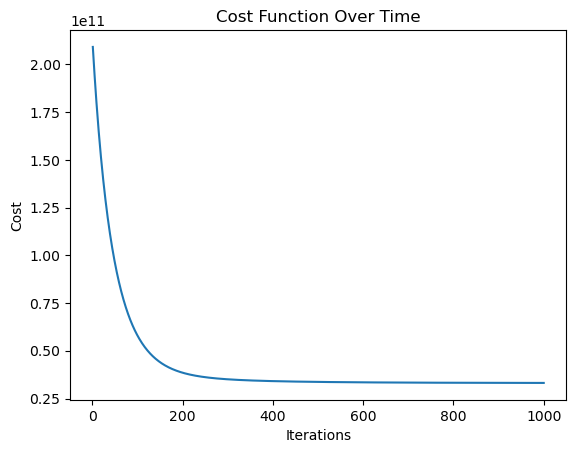

In [35]:
# Plot the cost function
plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Time')
plt.show()

In [41]:
# Make predictions
def predict(X, w):
    return X.dot(w)

y_pred = predict(X, w)

In [42]:
# Evaluate the model

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 66326763433.44336
R^2 Score: 0.5078745960658722


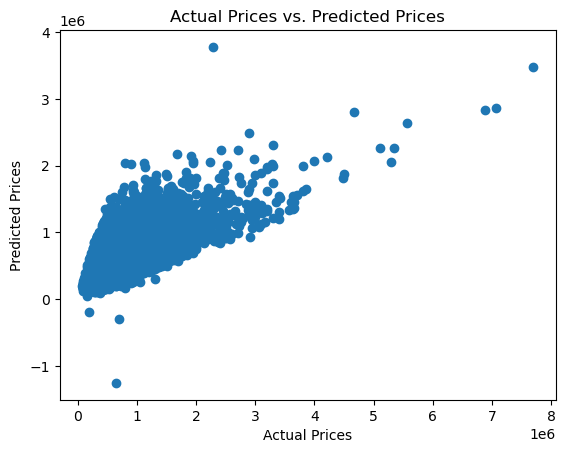

In [43]:
# Visualize the predictions
plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


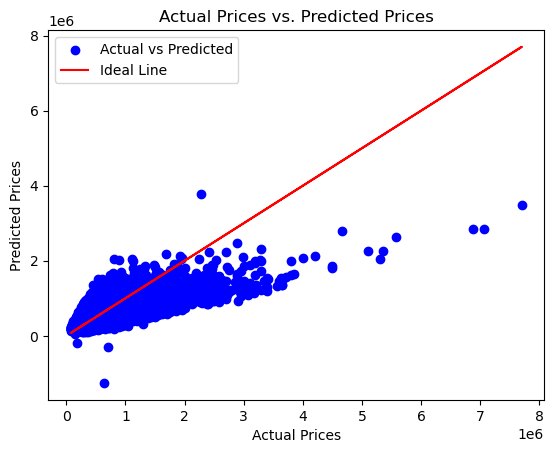

In [45]:
# The linear function
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y, y, color='red', label='Ideal Line')  # Plot the ideal line where actual = predicted
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.legend()
plt.show()